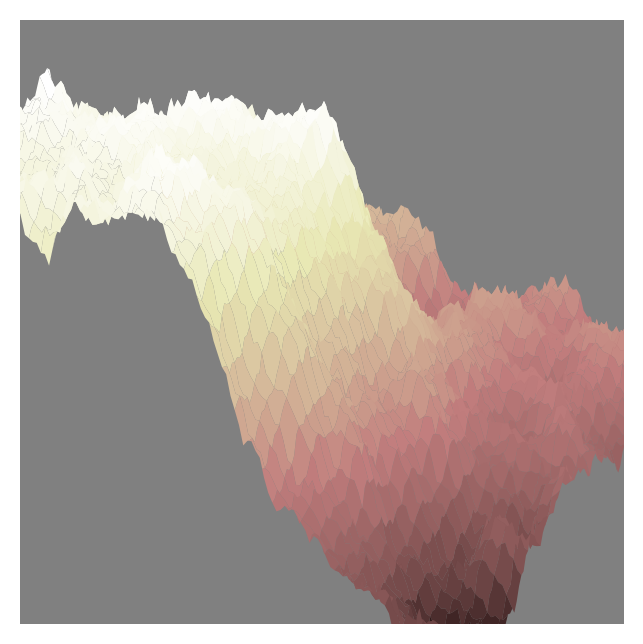

In [21]:
import random
import numpy as np
import matplotlib.pyplot as plt
# using the diamond-square algorithm:
# the dimensions of z have to be (2^n + 1, 2^n + 1)
# n = the number of iterations we will have to do for the 

iterations = 7
pixels = 2 ** iterations + 1
z = np.zeros((pixels, pixels))

# i need to streamline this... so inefficient yuck

def random_uniform(): # alter the range of the uniform to change the roughness of the terrain
    return 2 ** (-random.uniform(0.8, 1))
def rand(iter):
    return random.uniform(-0.5, 0.5) * random_uniform() ** iter

# initialisation - randomised
z[0][0] = rand(0)
z[pixels - 1][0] = rand(0)
z[0][pixels - 1] = rand(0)
z[pixels - 1][pixels - 1] = rand(0)


for iter in range(iterations):
    step = 2 ** (iterations - iter - 1)
    # diamond step
    for i in range(0, pixels - 1, step * 2):
        for j in range(0, pixels - 1, step * 2):

            z[i + step][j + step] = (z[i][j] + z[i + step*2][j] + z[i][j + step*2] + z[i + step*2][j + step*2])/4 + rand(iter)

    # square step
    for i in range(pixels):
        for j in range(pixels):
            # we need a better condition...
            # if i % step == 0 and j % step == 0
            if z[i][j] == 0 and i % step == 0 and j % step == 0:
                # at the edges, there are only three neighbouring points
                if i == 0:
                    z[i][j] = (z[i][j - step] + z[i][j + step] + z[i + step][j])/3 + rand(iter)
                elif i == pixels - 1:
                    z[i][j] = (z[i][j - step] + z[i][j + step] + z[i - step][j])/3 + rand(iter)
                elif j == 0:
                    z[i][j] = (z[i][j + step] + z[i - step][j] + z[i + step][j])/3 + rand(iter)
                elif j == pixels - 1:
                    z[i][j] = (z[i][j - step] + z[i - step][j] + z[i + step][j])/3 + rand(iter)
                else:
                    z[i][j] = (z[i][j - step] + z[i][j + step] + z[i - step][j] + z[i + step][j])/4 + rand(iter)

x, y = np.mgrid[0:pixels, 0:pixels]

fig = plt.figure(dpi = 200)
ax = plt.axes(projection = '3d')
ax.set_facecolor('grey')
ax.axis('off')
ax.view_init(20, 30)
ax.plot_surface(x, y, z, cmap = 'pink')
ax.dist = 6


(-0.5, 128.5, 128.5, -0.5)

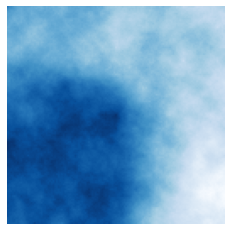

In [22]:
# noise
plt.imshow(z, cmap=plt.cm.Blues)
plt.axis('off')

In [17]:
# an alternative notation I found on github

import numpy as np
import matplotlib.pyplot as plt

# Create a cloud-like image based on noise generated by the "diamond-square"
# algorithm. The maths behind this code is described in the scipython blog
# article at
# https://scipython.com/blog/cloud-images-using-the-diamond-square-algorithm/
# Christian Hill, March 2016.

# The array must be square with edge length 2**n + 1
n = 6
N = 2**n + 1
# f scales the random numbers at each stage of the algorithm
f = 1.0

# Initialise the array with random numbers at its corners
arr = np.zeros((N, N))
arr[0::N-1,0::N-1] = np.random.uniform(-1, 1, (2,2))
side = N-1

nsquares = 1
while side > 1:
    sideo2 = side // 2

    # Diamond step
    for ix in range(nsquares):
        for iy in range(nsquares):
            x0, x1, y0, y1 = ix*side, (ix+1)*side, iy*side, (iy+1)*side
            xc, yc = x0 + sideo2, y0 + sideo2
            # Set this pixel to the mean of its "diamond" neighbours plus
            # a random offset.
            arr[yc,xc] = (arr[y0,x0] + arr[y0,x1] + arr[y1,x0] + arr[y1,x1])/4
            arr[yc,xc] += f * np.random.uniform(-1,1)

    # Square step: NB don't do this step until the pixels from the preceding
    # diamond step have been set.
    for iy in range(2*nsquares+1):
        yc = sideo2 * iy
        for ix in range(nsquares+1):
            xc = side * ix + sideo2 * (1 - iy % 2)
            if not (0 <= xc < N and 0 <= yc < N):
                continue
            tot, ntot = 0., 0
            # Set this pixel to the mean of its "square" neighbours plus
            # a random offset. At the edges, it has only three neighbours
            for (dx, dy) in ((-1,0), (1,0), (0,-1), (0,1)):
                xs, ys = xc + dx*sideo2, yc + dy*sideo2
                if not (0 <= xs < N and 0 <= ys < N):
                    continue
                else:
                    tot += arr[ys, xs]
                    ntot += 1
            arr[yc, xc] += tot / ntot + f * np.random.uniform(-1,1)
    side = sideo2
    nsquares *= 2
    f /= 2

plt.imshow(arr, cmap=plt.cm.Blues)
plt.axis('off')
plt.savefig('cloud.png')

array([[ 0.22538899,  0.        ,  0.        ,  0.        ,  0.83317507],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.6350756 ,  0.        ,  0.        ,  0.        , -0.07887382]])

In [230]:
# using brownian motion

0.20013590454659813

array([[-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-0.98425197, -0.98425197, -0.98425197, ..., -0.98425197,
        -0.98425197, -0.98425197],
       [-0.96850394, -0.96850394, -0.96850394, ..., -0.96850394,
        -0.96850394, -0.96850394],
       ...,
       [ 0.96850394,  0.96850394,  0.96850394, ...,  0.96850394,
         0.96850394,  0.96850394],
       [ 0.98425197,  0.98425197,  0.98425197, ...,  0.98425197,
         0.98425197,  0.98425197],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

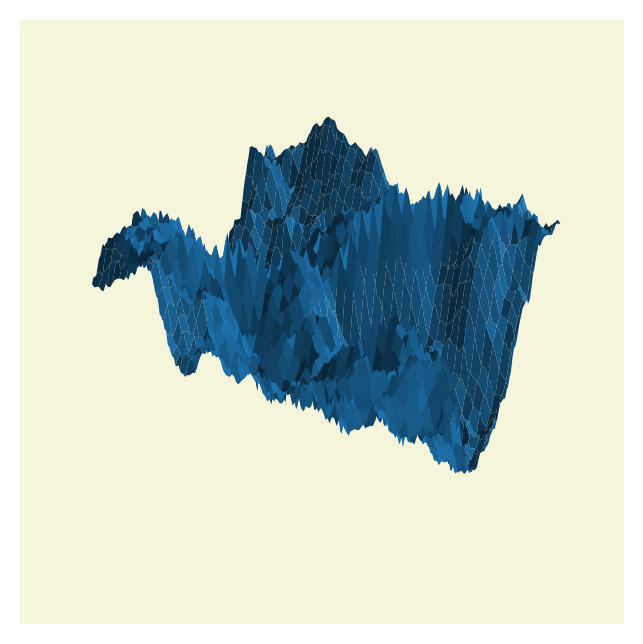

In [280]:
import random
import numpy as np
import matplotlib.pyplot as plt
levels = 8
size = 2 ** (levels - 1)
height  = np.zeros((size, size))

for lev in range(levels):
  step = size // 2 ** lev
  for y in range(0, size + 1, step):
    jumpover = 1 - (y // step) % 2 if lev > 0 else 0
    for x in range(step * jumpover, size + 1, step * (1 + jumpover)):
      pointer = 1 - (x // step) % 2 + 2 * jumpover if lev > 0 else 3
      yref, xref = step * (1 - pointer // 2), step * (1 - pointer % 2)
      corner1 = height[y - yref - 1, x - xref - 1]
      corner2 = height[y + yref - 1, x + xref - 1]
      average = (corner1 + corner2) / 2.0
      variation = step * (random.random() - 0.5)
      height[y - 1,x - 1] = average + variation if lev > 0 else 0

xg, yg = np.mgrid[-1:1:1j*size,-1:1:1j*size]


fig = plt.figure(dpi = 200)
ax = plt.axes(projection = '3d')
ax.set_facecolor('beige')
ax.axis('off')
ax.plot_surface(xg, yg, height)
xg

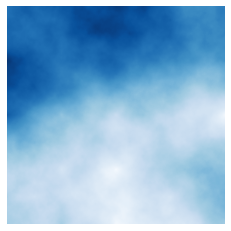

In [283]:
import numpy as np
import matplotlib.pyplot as plt

# The array must be square with edge length 2**n + 1
n = 10
N = 2**n + 1
# f scales the random numbers at each stage of the algorithm
f = 1.0

# Initialise the array with random numbers at its corners
arr = np.zeros((N, N))
arr[0::N-1,0::N-1] = np.random.uniform(-1, 1, (2,2))
side = N-1

nsquares = 1
while side > 1:
    sideo2 = side // 2

    # Diamond step
    for ix in range(nsquares):
        for iy in range(nsquares):
            x0, x1, y0, y1 = ix*side, (ix+1)*side, iy*side, (iy+1)*side
            xc, yc = x0 + sideo2, y0 + sideo2
            # Set this pixel to the mean of its "diamond" neighbours plus
            # a random offset.
            arr[yc,xc] = (arr[y0,x0] + arr[y0,x1] + arr[y1,x0] + arr[y1,x1])/4
            arr[yc,xc] += f * np.random.uniform(-1,1)

    # Square step: NB don't do this step until the pixels from the preceding
    # diamond step have been set.
    for iy in range(2*nsquares+1):
        yc = sideo2 * iy
        for ix in range(nsquares+1):
            xc = side * ix + sideo2 * (1 - iy % 2)
            if not (0 <= xc < N and 0 <= yc < N):
                continue
            tot, ntot = 0., 0
            # Set this pixel to the mean of its "square" neighbours plus
            # a random offset. At the edges, it has only three neighbours
            for (dx, dy) in ((-1,0), (1,0), (0,-1), (0,1)):
                xs, ys = xc + dx*sideo2, yc + dy*sideo2
                if not (0 <= xs < N and 0 <= ys < N):
                    continue
                else:
                    tot += arr[ys, xs]
                    ntot += 1
            arr[yc, xc] += tot / ntot + f * np.random.uniform(-1,1)
    side = sideo2
    nsquares *= 2
    f /= 2

plt.imshow(arr, cmap=plt.cm.Blues)
plt.axis('off')
plt.show()